In [1]:
%run /data/NNDSP/anal/analysis_notebooks/follow_up_analysis/util_dist.ipynb

# Hypothesis #1

Research Question:
If the distribution of ages in training and test sets is causing the poor generalizability of both complex and simple models, then both simple and complex models trained on datasets with similar age distributions to our original training dataset will perform worse than chance when tested on samples from new datasets that mimic the age distribution of our original test dataset.

## Setup

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import subprocess
from datetime import date
import re
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [8]:
#project directory
project_dir = Path('/data/NNDSP')
# NNDSP data directories
nndsp_project_dir = Path('/data/NNDSP')
nndsp_bids_dir = nndsp_project_dir.joinpath('bids_2017_07_14_generic')
nndsp_fs_dir = nndsp_project_dir.joinpath('derivatives/fs5.3_subj')
nndsp_bar_dir = nndsp_project_dir.joinpath('derivatives/bar_subj')
nndsp_mriqc_dir = nndsp_project_dir.joinpath('derivatives/mriqc_2018_06_08')
nndsp_pheno_file = nndsp_project_dir.joinpath('anal/analysis_notebooks/phenotype_files/NNDSP_famid.csv')

# HCP data directories
hcp_project_dir = Path('/data/HCP_preproc')
hcp_bids_dir = hcp_project_dir.joinpath('bids_hcp_1200')
hcp_fs_dir = nndsp_project_dir.joinpath('derivatives/fs_hcp_subj')
hcp_bar_dir = nndsp_project_dir.joinpath('derivatives/bar_hcp_subj')
hcp_mriqc_dir = hcp_project_dir.joinpath('mriqc_hcp_2018_07_22')
hcp_pheno_file = nndsp_project_dir.joinpath('nino/HCP_ages.csv')
hcp_pheno2_file = nndsp_project_dir.joinpath('anal/analysis_notebooks/phenotype_files/hcp_unrestricted.csv')

# NKI data directories
nki_project_dir = nndsp_project_dir
nki_bids_dir = nki_project_dir.joinpath('anal/NKI')
nki_fs_dir = nki_project_dir.joinpath('derivatives/fs_nki_subj')
nki_bar_dir = nki_project_dir.joinpath('derivatives/bar_nki_subj')
nki_mriqc_dir = nki_project_dir.joinpath('derivatives/mriqc_nki_2018_07_16')
nki_pheno_file = nki_project_dir.joinpath('anal/analysis_notebooks/phenotype_files/participants.tsv')

# CoRR data directories
corr_project_dir = Path('/data/DSST/CoRR')
corr_bids_dir = corr_project_dir.joinpath('bids_corr')
corr_fs_dir = corr_project_dir.joinpath('derivatives/fs_corr')
corr_bar_dir = corr_project_dir.joinpath('derivatives/bar_corr/baracus')
corr_mriqc_dir = corr_project_dir.joinpath('derivatives/mriqc_corr')
corr_pheno_file = corr_project_dir.joinpath('phenotype_files/corr_ages.csv')

# SALD data directories
sald_project_dir = Path('/data/DSST/SALD')
sald_bids_dir = sald_project_dir.joinpath('bids_sald')
sald_fs_dir = sald_project_dir.joinpath('derivatives/fs_sald')
sald_bar_dir = sald_project_dir.joinpath('derivatives/bar_sald/baracus')
sald_mriqc_dir = sald_project_dir.joinpath('derivatives/mriqc_sald')
sald_pheno_file = sald_project_dir.joinpath('phenotype_files/sub_information.xlsx')

In [9]:
%run /data/NNDSP/anal/analysis_notebooks/follow_up_analysis/util_setup.ipynb

## NNDSP Subject Data

In [10]:
# merge the subjects that we have fs and add subject number
df_nndsp = nndsp_subjectdata(nndsp_fs_dir, nndsp_pheno_file)
df_nndsp.head()

,subj_paths,subject,MRN,nuclear_fam_id,sex,age
53,/data/NNDSP/derivatives/fs5.3_subj/sub-0102,102,4569829,10392,2,28.542094
116,/data/NNDSP/derivatives/fs5.3_subj/sub-0114,114,4578673,10391,2,25.957563
330,/data/NNDSP/derivatives/fs5.3_subj/sub-0126,126,4572324,10381,2,6.015058
291,/data/NNDSP/derivatives/fs5.3_subj/sub-0127,127,4572166,10381,2,7.926078
139,/data/NNDSP/derivatives/fs5.3_subj/sub-0133,133,4601373,10208,1,22.168378


## HCP Subject Data

In [11]:
# merge the subjects that we have fs and add subject number
df_hcp = hcp_subjectdata(hcp_fs_dir, hcp_pheno_file, hcp_pheno2_file)
df_hcp.head()

,subj_paths,subject,age,HasGT,ZygositySR,ZygosityGT,Family_ID,Mother_ID,Father_ID,TestRetestInterval,...,SSAGA_Times_Used_Cocaine,SSAGA_Times_Used_Hallucinogens,SSAGA_Times_Used_Opiates,SSAGA_Times_Used_Sedatives,SSAGA_Times_Used_Stimulants,SSAGA_Mj_Use,SSAGA_Mj_Ab_Dep,SSAGA_Mj_Age_1st_Use,SSAGA_Mj_Times_Used,sex
339,/data/NNDSP/derivatives/fs_hcp_subj/sub-100206,100206,27,True,NotTwin,,56037_85858,56037,85858,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2
873,/data/NNDSP/derivatives/fs_hcp_subj/sub-100307,100307,27,True,NotMZ,MZ,51488_81352,51488,81352,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1
579,/data/NNDSP/derivatives/fs_hcp_subj/sub-100408,100408,33,True,MZ,MZ,51730_81594,51730,81594,NaN,...,5.0,5.0,5.0,0.0,0.0,1.0,1.0,2.0,4.0,2
206,/data/NNDSP/derivatives/fs_hcp_subj/sub-100610,100610,27,True,NotMZ,DZ,52813_82634,52813,82634,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2
325,/data/NNDSP/derivatives/fs_hcp_subj/sub-101006,101006,35,True,MZ,,51283_52850_81149,51283,81149,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,1


## NKI Subject Data

In [12]:
# merge the subjects that we have fs and add subject number
df_nki = nki_subjectdata(nki_fs_dir, nki_pheno_file)
df_nki.head()

,subj_paths,subject,age,sex,handedness
1269,/data/NNDSP/derivatives/fs_nki_subj/sub-A00008326,A00008326,59.0,1,RIGHT
548,/data/NNDSP/derivatives/fs_nki_subj/sub-A00008399,A00008399,23.0,2,RIGHT
820,/data/NNDSP/derivatives/fs_nki_subj/sub-A00010893,A00010893,28.0,2,RIGHT
1125,/data/NNDSP/derivatives/fs_nki_subj/sub-A00013809,A00013809,61.0,1,RIGHT
822,/data/NNDSP/derivatives/fs_nki_subj/sub-A00018030,A00018030,11.0,1,LEFT


## CoRR Subject Data

In [13]:
# merge the subjects that we have fs and add subject number
df_corr = corr_subjectdata(corr_fs_dir, corr_pheno_file)
df_corr.head()

,subj_paths,subject,Unnamed: 0,age,sex
1816,/data/DSST/CoRR/derivatives/fs_corr/sub-0003001,3001,0,25,2
4159,/data/DSST/CoRR/derivatives/fs_corr/sub-0003002,3002,2,23,1
4427,/data/DSST/CoRR/derivatives/fs_corr/sub-0003004,3004,4,31,2
4077,/data/DSST/CoRR/derivatives/fs_corr/sub-0003006,3006,6,23,1
131,/data/DSST/CoRR/derivatives/fs_corr/sub-0003007,3007,8,43,2


## SALD Subject Data

In [14]:
# complete once we have SALD FS files
df_sald = sald_subjectdata(sald_fs_dir, sald_pheno_file)
df_sald.head()

,subj_paths,subject,Sex,age,sex,Edinburgh Handedness Inventory (EHI),FunImg,T1Img
98,/data/DSST/SALD/derivatives/fs_sald/sub-031274,31274,F,72,1,100.0,1,1
28,/data/DSST/SALD/derivatives/fs_sald/sub-031277,31277,F,60,1,100.0,1,1
95,/data/DSST/SALD/derivatives/fs_sald/sub-031279,31279,M,62,2,100.0,1,1
29,/data/DSST/SALD/derivatives/fs_sald/sub-031281,31281,F,65,1,NaN,1,1
108,/data/DSST/SALD/derivatives/fs_sald/sub-031285,31285,M,54,2,NaN,1,1


## Sample NKI:NNDSP

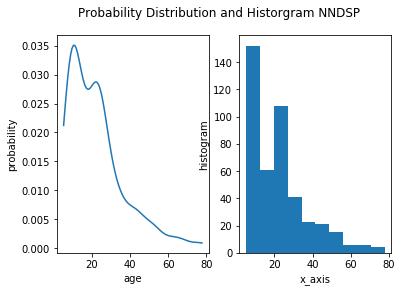

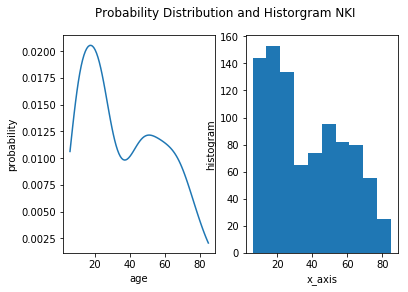

New Length:  329  with Precision:  1.0
Actual Length:  316


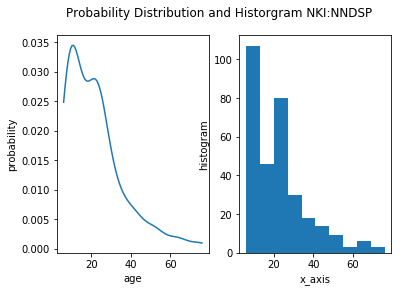

stats:  Ks_2sampResult(statistic=0.056462358427714854, pvalue=0.5905359773580829)


In [18]:
df_nki_nndsp = sample(df_nki, df_nndsp, title_to='NKI', title_from='NNDSP')
df_nki_nndsp = df_nki_nndsp.sort_values(by='subject')

## Sample CoRR:NNDSP

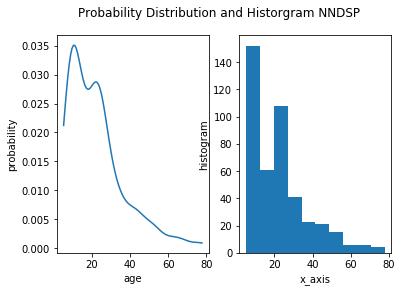

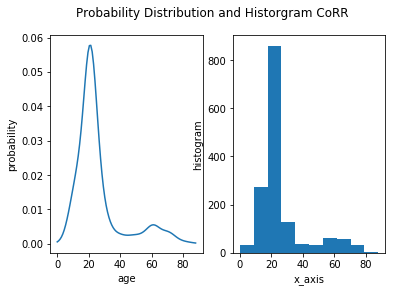

New Length:  187  with Precision:  1.0
Actual Length:  172


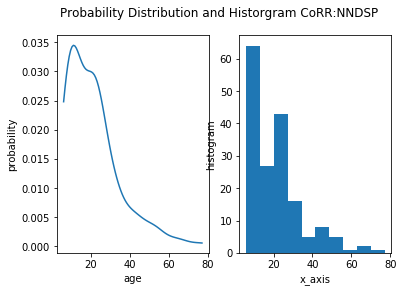

stats:  Ks_2sampResult(statistic=0.08347081049438565, pvalue=0.3422332757714718)


In [19]:
df_corr_nndsp = sample(df_corr, df_nndsp, title_to='CoRR', title_from='NNDSP', bucket_size=3)
df_corr_nndsp = df_corr_nndsp.sort_values(by='subject')

## Sample SALD:NNDSP

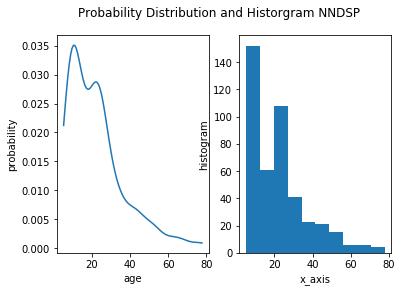

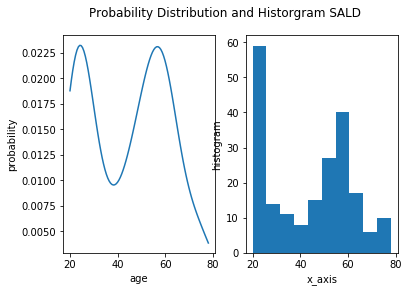

New Length:  128.27650835937249  with Precision:  0.0999999999999992
Actual Length:  54


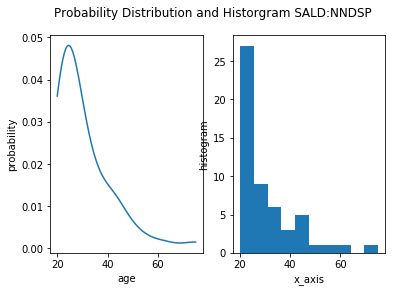

stats:  Ks_2sampResult(statistic=0.4986439528773625, pvalue=3.238828470591827e-11)


In [22]:
df_sald_nndsp = sample(df_sald, df_nndsp, title_to='SALD', title_from='NNDSP', bucket_size=3)
df_sald_nndsp = df_sald_nndsp.sort_values(by='subject')

## Sample NKI:HCP

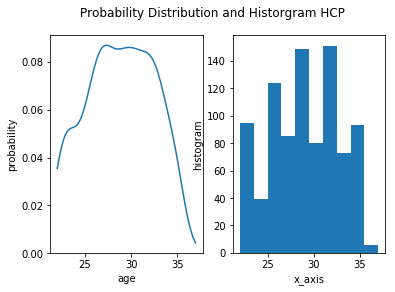

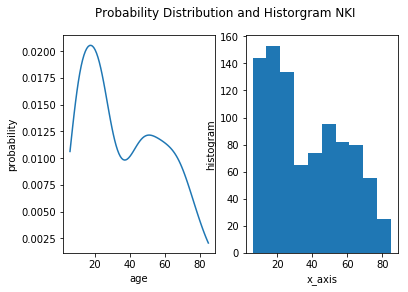

New Length:  94  with Precision:  1.0
Actual Length:  89


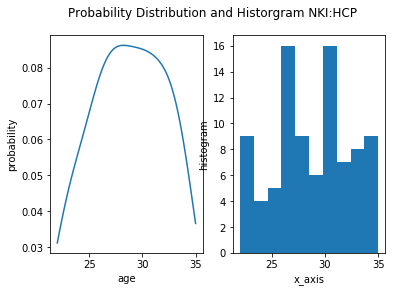

stats:  Ks_2sampResult(statistic=0.02439269349067863, pvalue=0.9999999998232387)


In [23]:
df_nki_hcp = sample(df_nki, df_hcp, title_to='NKI', title_from='HCP', bucket_size=2)
df_nki_hcp = df_nki_hcp.sort_values(by='subject')

## Sample CoRR:HCP

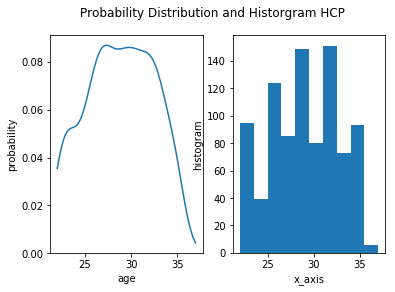

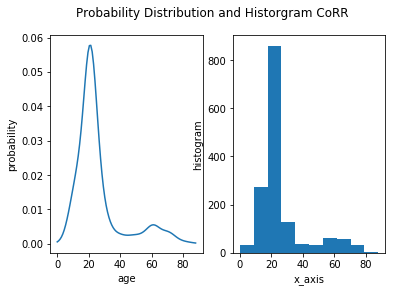

New Length:  102  with Precision:  1.0
Actual Length:  98


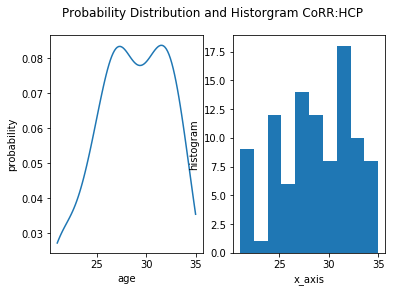

stats:  Ks_2sampResult(statistic=0.07142857142857142, pvalue=0.7430521144900619)


In [24]:
df_corr_hcp = sample(df_corr, df_hcp, title_to='CoRR', title_from='HCP', bucket_size=3)
df_corr_hcp = df_corr_hcp.sort_values(by='subject')

## Sample SALD:HCP

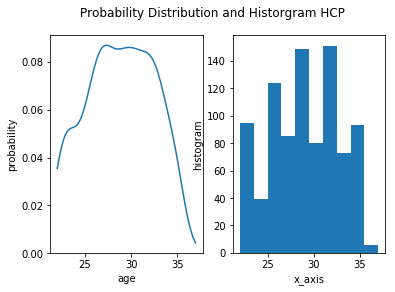

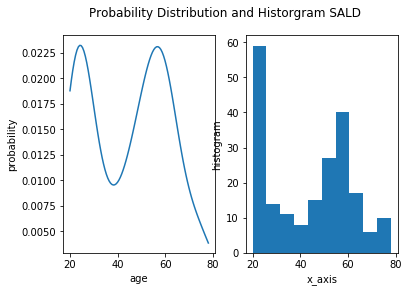

Actual Length:  35


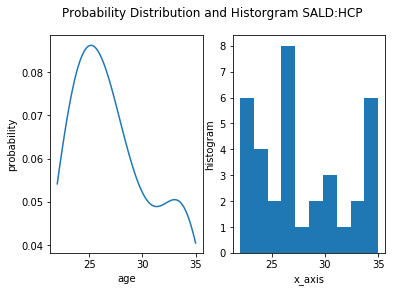

stats:  Ks_2sampResult(statistic=0.19744612928970473, pvalue=0.12737507186823213)


In [25]:
df_sald_hcp = sample(df_sald, df_hcp, title_to='SALD', title_from='HCP', bucket_size=2, new_len=65)
df_sald_hcp = df_sald_hcp.sort_values(by='subject')

# Train Test Hypothesis

In [34]:
%run /data/NNDSP/anal/analysis_notebooks/follow_up_analysis/util_models.ipynb

In [27]:
hcp_mae = {}
nki2hcp_mae = {}
corr2hcp_mae = {}
sald2hcp_mae = {}

## Train NNDSP

In [28]:
x, nndsp_features = subject_features([os.path.basename(s) for s in df_nndsp.subj_paths], nndsp_bar_dir)

In [29]:
scores_nndsp, nndsp_complex_train, nndsp_complex_test, nndsp_complex_pipes = complex_model(df_nndsp, nndsp_bar_dir, features = nndsp_features)


Cortical Thickness Pipeline
Mean Absolute Error (Train, thickness): 0.10004356518928934
Mean Absolute Error (Test, thickness): 6.27928609345502

Subcortival Volumes Pipeline
Mean Absolute Error (Train, aseg): 3.470766854265161
Mean Absolute Error (Test, aseg): 5.822662527083657

Cortical Surface Area Pipeline
Mean Absolute Error (Train, area): 0.10003781165933721
Mean Absolute Error (Test, area): 7.248309060385128

Stacking predictions
Beginning Random Forest
Fitting stacking model
best max_depth: 4
Mean Absolute Error (Train): 2.680212870640973
Mean Absolute Error (Test): 4.7670562364190445
                     r2     rpear    rpear2       mae     medae
aseg           0.696103  0.856973  0.734403  5.822663  4.007172
ct             0.690906  0.835506  0.698070  6.279286  4.277801
ca             0.599063  0.781948  0.611442  7.248309  5.597002
mean_pred      0.733120  0.881114  0.776363  5.423219  3.560103
pred_age_test  0.769952  0.884195  0.781801  4.767056  2.452490


/data/migineishvilin2/python/envs/100runs/lib/python3.6/site-packages/ipykernel_launcher.py:111: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/data/migineishvilin2/python/envs/100runs/lib/python3.6/site-packages/ipykernel_launcher.py:112: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/data/migineishvilin2/python/envs/100runs/lib/python3.6/site-packages/ipykernel_launcher.py:113: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/data/migineishvilin2/python/en

In [35]:
nndsp_simple_train, nndsp_simple_test, nndsp_simple_pipe = simple_model(df_nndsp, nndsp_bar_dir, 
                                                                        model=True, 
                                                                        model_train = nndsp_complex_train, 
                                                                        model_test=nndsp_complex_test)

Finding Subjects
Extracting Features
431
Training Model
Mean Absolute Error (Train): 6.145385485816903
Mean Absolute Error (Test): 7.409393232060652


### Test on HCP

In [36]:
x, hcp_features = subject_features([os.path.basename(s) for s in df_hcp.subj_paths], hcp_bar_dir)

In [37]:
hcp_mae['Complex on NNDSP'] = complex_test(df_hcp, hcp_bar_dir, nndsp_complex_pipes, data='HCP', features=hcp_features)

895
895
Predicting from Pipelines
Mean Absolute Error (HCP thickness): 5.6008288683611305
Mean Absolute Error (HCP aseg): 6.124706124266517
Mean Absolute Error (HCP area): 5.067209861384121
Mean Absolute Error (HCP stack): 5.997762937916886


In [38]:
hcp_mae['Simple on NNDSP'] = simple_test(df_hcp, hcp_bar_dir, nndsp_simple_pipe, data='HCP')

Finding Subjects
895
895
Extracting Features
895
Predicting Pipes
Mean Absolute Error (HCP simple): 11.069409199480788


### Test on NKI:HCP

In [39]:
x, nki2hcp_features = subject_features([os.path.basename(s) for s in df_nki_hcp.subj_paths], nki_bar_dir)

In [40]:
nki2hcp_mae['Complex on NNDSP'] = complex_test(df_nki_hcp, nki_bar_dir, nndsp_complex_pipes, data='NKI:HCP', is_int=False, features=nki2hcp_features)

71
71
Predicting from Pipelines
Mean Absolute Error (NKI:HCP thickness): 4.676841344926702
Mean Absolute Error (NKI:HCP aseg): 6.030132105669114
Mean Absolute Error (NKI:HCP area): 5.008533692411346
Mean Absolute Error (NKI:HCP stack): 4.948268972404027


In [41]:
nki2hcp_mae['Simple on NNDSP'] = simple_test(df_nki_hcp, nki_bar_dir, nndsp_simple_pipe, data='NKI:HCP', is_int=False)

Finding Subjects
71
71
Extracting Features
71
Predicting Pipes
Mean Absolute Error (NKI:HCP simple): 5.749647352410519


### Test on CORRS:HCP

In [42]:
df_corr_hcp.head()

,subj_paths,subject,Unnamed: 0,age,sex
4372,/data/DSST/CoRR/derivatives/fs_corr/sub-0003009,3009,12,33,2
1687,/data/DSST/CoRR/derivatives/fs_corr/sub-0003012,3012,18,33,2
4161,/data/DSST/CoRR/derivatives/fs_corr/sub-0003014,3014,22,28,2
2691,/data/DSST/CoRR/derivatives/fs_corr/sub-0003026,3026,44,29,1
3828,/data/DSST/CoRR/derivatives/fs_corr/sub-0003032,3032,46,33,1


In [43]:
x, corr2hcp_features = subject_features([os.path.basename(s) for s in df_corr_hcp.subj_paths], corr_bar_dir, 
                                        session='_ses-1')

In [44]:
corr2hcp_mae['Complex on NNDSP'] = complex_test(df_corr_hcp, corr_bar_dir, nndsp_complex_pipes, data='CoRR:HCP',
                                             features = corr2hcp_features, session = '_ses-1')

83
83
Predicting from Pipelines
Mean Absolute Error (CoRR:HCP thickness): 4.992820147547776
Mean Absolute Error (CoRR:HCP aseg): 4.051685447208585
Mean Absolute Error (CoRR:HCP area): 13.806252021090561
Mean Absolute Error (CoRR:HCP stack): 5.625768781884287


In [45]:
corr2hcp_mae['Simple on NNDSP'] = simple_test(df_corr_hcp, corr_bar_dir, nndsp_simple_pipe, 
                                              data='CoRR:HCP', session = '_ses-1')

Finding Subjects
83
83
Extracting Features
83
Predicting Pipes
Mean Absolute Error (CoRR:HCP simple): 6.629112927882599


### Test on SALD:HCP

In [46]:
x, sald2hcp_features = subject_features([os.path.basename(s) for s in df_sald_hcp.subj_paths], sald_bar_dir)

In [47]:
sald2hcp_mae['Complex on NNDSP'] = complex_test(df_sald_hcp.drop_duplicates(), sald_bar_dir, nndsp_complex_pipes, data='SALD:HCP',
                                               features = sald2hcp_features)

35
35
Predicting from Pipelines
Mean Absolute Error (SALD:HCP thickness): 5.295433523532927
Mean Absolute Error (SALD:HCP aseg): 3.991980378961029
Mean Absolute Error (SALD:HCP area): 5.194872689264709
Mean Absolute Error (SALD:HCP stack): 6.262092691194788


In [48]:
sald2hcp_mae['Simple on NNDSP'] = simple_test(df_sald_hcp, sald_bar_dir, nndsp_simple_pipe, data='SALD:HCP')

Finding Subjects
35
35
Extracting Features
35
Predicting Pipes
Mean Absolute Error (SALD:HCP simple): 4.591988370947182


## Train NKI:NNDSP

In [49]:
x, nki2nndsp_features = subject_features([os.path.basename(s) for s in df_nki_nndsp.subj_paths], nki_bar_dir)

In [50]:
scores_nki2nndsp, nki2nndsp_complex_train, nki2nndsp_complex_test, nki2nndsp_complex_pipes = complex_model(df_nki_nndsp, 
                                                                                                           nki_bar_dir, 
                                                                                                           is_int = False,
                                                                                                          features=nki2nndsp_features)


Cortical Thickness Pipeline
Mean Absolute Error (Train, thickness): 0.09904503522386904
Mean Absolute Error (Test, thickness): 6.816336959981852

Subcortival Volumes Pipeline
Mean Absolute Error (Train, aseg): 4.113118619069933
Mean Absolute Error (Test, aseg): 7.823350083879324

Cortical Surface Area Pipeline
Mean Absolute Error (Train, area): 0.0995518743901379
Mean Absolute Error (Test, area): 9.274915338699717

Stacking predictions
Beginning Random Forest
Fitting stacking model
best max_depth: 9
Mean Absolute Error (Train): 2.3997900966722234
Mean Absolute Error (Test): 7.009532450428707
                     r2     rpear    rpear2       mae     medae
aseg           0.418826  0.721651  0.520781  7.823350  5.968091
ct             0.595781  0.815639  0.665267  6.816337  5.749537
ca             0.219294  0.566580  0.321013  9.274915  7.318709
mean_pred      0.604334  0.810393  0.656737  6.532468  5.550533
pred_age_test  0.518180  0.833024  0.693929  7.009532  5.378721


/data/migineishvilin2/python/envs/100runs/lib/python3.6/site-packages/ipykernel_launcher.py:111: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/data/migineishvilin2/python/envs/100runs/lib/python3.6/site-packages/ipykernel_launcher.py:112: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/data/migineishvilin2/python/envs/100runs/lib/python3.6/site-packages/ipykernel_launcher.py:113: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/data/migineishvilin2/python/en

In [51]:
nki2nndsp_simple_train, nki2nndsp_simple_test, nki2nndsp_simple_pipe = simple_model(df_nki_nndsp, nki_bar_dir, 
                                                                        model=True, 
                                                                        model_train = nki2nndsp_complex_train, 
                                                                        model_test=nki2nndsp_complex_test,
                                                                                   is_int=False)

Finding Subjects
Extracting Features
261
Training Model
Mean Absolute Error (Train): 8.520003764125837
Mean Absolute Error (Test): 6.920553779609854


### Test on HCP

In [52]:
hcp_mae['Complex on NKI:NNDSP'] = complex_test(df_hcp, hcp_bar_dir, nki2nndsp_complex_pipes, data='HCP', is_int=True, features = hcp_features)

895
895
Predicting from Pipelines
Mean Absolute Error (HCP thickness): 7.288390254111423
Mean Absolute Error (HCP aseg): 8.199216054948065
Mean Absolute Error (HCP area): 5.806885400591533
Mean Absolute Error (HCP stack): 6.761239774923529


In [53]:
hcp_mae['Simple on NKI:NNDSP'] = simple_test(df_hcp, hcp_bar_dir, nki2nndsp_simple_pipe, data='HCP')

Finding Subjects
895
895
Extracting Features
895
Predicting Pipes
Mean Absolute Error (HCP simple): 11.742704742897637


### Test on CoRR:HCP

In [54]:
corr2hcp_mae['Complex on NKI:NNDSP'] = complex_test(df_corr_hcp, corr_bar_dir, nki2nndsp_complex_pipes, data='CoRR:HCP',
        features = corr2hcp_features, session = '_ses-1')

83
83
Predicting from Pipelines
Mean Absolute Error (CoRR:HCP thickness): 6.021804711500696
Mean Absolute Error (CoRR:HCP aseg): 6.780436359757347
Mean Absolute Error (CoRR:HCP area): 20.01910781144857
Mean Absolute Error (CoRR:HCP stack): 6.749146814422339


In [55]:
corr2hcp_mae['Simple on NKI:NNDSP'] = simple_test(df_corr_hcp, corr_bar_dir, nki2nndsp_simple_pipe, data='CoRR:HCP',
                                                 session = '_ses-1')

Finding Subjects
83
83
Extracting Features
83
Predicting Pipes
Mean Absolute Error (CoRR:HCP simple): 7.607382437639236


### Test on SALD:HCP

In [56]:
sald2hcp_mae['Complex on NKI:NNDSP'] = complex_test(df_sald_hcp, sald_bar_dir, nki2nndsp_complex_pipes, data='SALD:HCP',
                                                   features = sald2hcp_features)

35
35
Predicting from Pipelines
Mean Absolute Error (SALD:HCP thickness): 4.258742253661688
Mean Absolute Error (SALD:HCP aseg): 6.380630426384694
Mean Absolute Error (SALD:HCP area): 4.215176461043989
Mean Absolute Error (SALD:HCP stack): 8.00959360995451


In [57]:
sald2hcp_mae['Simple on NKI:NNDSP'] = simple_test(df_sald_hcp, sald_bar_dir, nki2nndsp_simple_pipe, data='SALD:HCP')

Finding Subjects
35
35
Extracting Features
35
Predicting Pipes
Mean Absolute Error (SALD:HCP simple): 6.310401574186334


## Train on CoRR:NNDSP

In [58]:
scores_corr2nndsp, corr2nndsp_complex_train, corr2nndsp_complex_test, corr2nndsp_complex_pipes = complex_model(df_corr_nndsp, 
                                                                                                           corr_bar_dir, 
                                                                                                           is_int = True, 
                                                                                                            session = '_ses-1')

Finding Subjects
Extracting Features

Cortical Thickness Pipeline
Mean Absolute Error (Train, thickness): 0.09999633865011352
Mean Absolute Error (Test, thickness): 6.229117532446923

Subcortival Volumes Pipeline
Mean Absolute Error (Train, aseg): 3.1947685897585387
Mean Absolute Error (Test, aseg): 5.505870684099948

Cortical Surface Area Pipeline
Mean Absolute Error (Train, area): 0.09966267775106093
Mean Absolute Error (Test, area): 6.932149816898756

Stacking predictions
Beginning Random Forest
Fitting stacking model
best max_depth: 8
Mean Absolute Error (Train): 2.37119834817124
Mean Absolute Error (Test): 4.980287258376545
                     r2     rpear    rpear2       mae     medae
aseg           0.692483  0.855866  0.732506  5.505871  4.287889
ct             0.561874  0.758237  0.574924  6.229118  5.425747
ca             0.443709  0.690546  0.476854  6.932150  5.562043
mean_pred      0.723877  0.869193  0.755497  4.536465  3.376269
pred_age_test  0.678452  0.826765  0.683541

/data/migineishvilin2/python/envs/100runs/lib/python3.6/site-packages/ipykernel_launcher.py:111: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/data/migineishvilin2/python/envs/100runs/lib/python3.6/site-packages/ipykernel_launcher.py:112: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/data/migineishvilin2/python/envs/100runs/lib/python3.6/site-packages/ipykernel_launcher.py:113: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/data/migineishvilin2/python/en

In [59]:
corr2nndsp_simple_train, corr2nndsp_simple_test, corr2nndsp_simple_pipe = simple_model(df_corr_nndsp, corr_bar_dir, 
                                                                        model=True, 
                                                                        model_train = corr2nndsp_complex_train, 
                                                                        model_test=corr2nndsp_complex_test,
                                                                                   is_int=True, session = '_ses-1')

Finding Subjects
Extracting Features
167
Training Model
Mean Absolute Error (Train): 6.606334412585845
Mean Absolute Error (Test): 7.551242360907315


### Test on HCP

In [60]:
hcp_mae['Complex on CoRR:NNDSP'] = complex_test(df_hcp, hcp_bar_dir, corr2nndsp_complex_pipes, data='HCP', is_int=True, 
                                               features = hcp_features)

895
895
Predicting from Pipelines
Mean Absolute Error (HCP thickness): 8.012291216233358
Mean Absolute Error (HCP aseg): 7.181821429789014
Mean Absolute Error (HCP area): 4.519728169474781
Mean Absolute Error (HCP stack): 6.435024308156152


In [61]:
hcp_mae['Simple on CoRR:NNDSP'] = simple_test(df_hcp, hcp_bar_dir, corr2nndsp_simple_pipe, data='HCP')

Finding Subjects
895
895
Extracting Features
895
Predicting Pipes
Mean Absolute Error (HCP simple): 10.313632814422206


### Test on NKI:HCP

In [62]:
nki2hcp_mae['Complex on CoRR:NNDSP'] = complex_test(df_nki_hcp, nki_bar_dir, corr2nndsp_complex_pipes, data='NKI:HCP', 
                                                    is_int=False, features = nki2hcp_features)

71
71
Predicting from Pipelines
Mean Absolute Error (NKI:HCP thickness): 5.82073088071513
Mean Absolute Error (NKI:HCP aseg): 5.580204901504406
Mean Absolute Error (NKI:HCP area): 6.107580951456226
Mean Absolute Error (NKI:HCP stack): 6.279537076186723


In [63]:
nki2hcp_mae['Simple on CoRR:NNDSP'] = simple_test(df_nki_hcp, nki_bar_dir, corr2nndsp_simple_pipe, data='NKI:HCP', is_int = False)

Finding Subjects
71
71
Extracting Features
71
Predicting Pipes
Mean Absolute Error (NKI:HCP simple): 7.791724864333149


### Test on SALD:HCP

In [64]:
sald2hcp_mae['Complex on CoRR:NNDSP'] = complex_test(df_sald_hcp, sald_bar_dir, corr2nndsp_complex_pipes, 
                                                     data='SALD:HCP', is_int=True, features = sald2hcp_features)

35
35
Predicting from Pipelines
Mean Absolute Error (SALD:HCP thickness): 4.262844248691877
Mean Absolute Error (SALD:HCP aseg): 4.740214980960279
Mean Absolute Error (SALD:HCP area): 4.908463027254348
Mean Absolute Error (SALD:HCP stack): 5.408093307882593


In [65]:
sald2hcp_mae['Simple on CoRR:NNDSP'] = simple_test(df_sald_hcp, sald_bar_dir, corr2nndsp_simple_pipe, data='SALD:HCP', is_int = True)

Finding Subjects
35
35
Extracting Features
35
Predicting Pipes
Mean Absolute Error (SALD:HCP simple): 7.406291982569422


# Statistical Tests

In [83]:
%run /data/NNDSP/anal/analysis_notebooks/follow_up_analysis/util_stats.ipynb

## Test on HCP

In [84]:
hcp_rand_ages = random_ages(df_hcp)

Picking Random Ages
0
100
200
300
400
500
600
700
800
900
Calculating Mean Absolute Errors


/data/migineishvilin2/python/envs/100runs/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

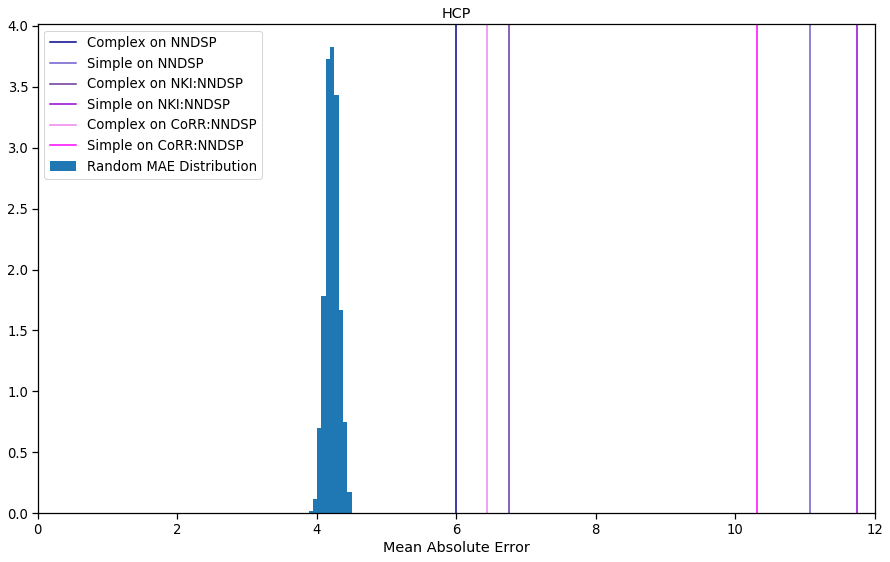

Percentile of  for Complex on NNDSP 100.0
Percentile of  for Simple on NNDSP 100.0
Percentile of  for Complex on NKI:NNDSP 100.0
Percentile of  for Simple on NKI:NNDSP 100.0
Percentile of  for Complex on CoRR:NNDSP 100.0
Percentile of  for Simple on CoRR:NNDSP 100.0


In [93]:
plot_rand_hist(hcp_rand_ages, hcp_mae, title='HCP', x_max = 12,
              set_context='notebook', fig_tuple=(15, 9), legend=True)
get_percentile(hcp_rand_ages, hcp_mae)

## Test NKI:HCP

In [94]:
nki2hcp_rand_ages = random_ages(df_nki_hcp)

Picking Random Ages
0
100
200
300
400
500
600
700
800
900
Calculating Mean Absolute Errors


/data/migineishvilin2/python/envs/100runs/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

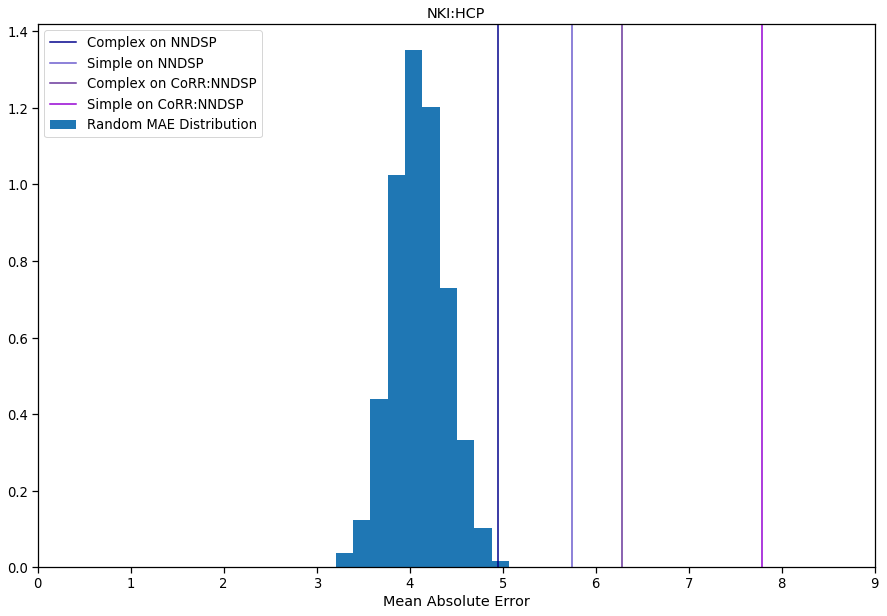

Percentile of  for Complex on NNDSP 99.7997997997998
Percentile of  for Simple on NNDSP 100.0
Percentile of  for Complex on CoRR:NNDSP 100.0
Percentile of  for Simple on CoRR:NNDSP 100.0


In [99]:
plot_rand_hist(nki2hcp_rand_ages, nki2hcp_mae, title='NKI:HCP', x_max = 9,
              set_context='notebook', fig_tuple=(15, 10), legend=True)
get_percentile(nki2hcp_rand_ages, nki2hcp_mae)

## Test CoRR:HCP

In [100]:
corr2hcp_rand_ages = random_ages(df_corr_hcp)

Picking Random Ages
0
100
200
300
400
500
600
700
800
900
Calculating Mean Absolute Errors


/data/migineishvilin2/python/envs/100runs/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

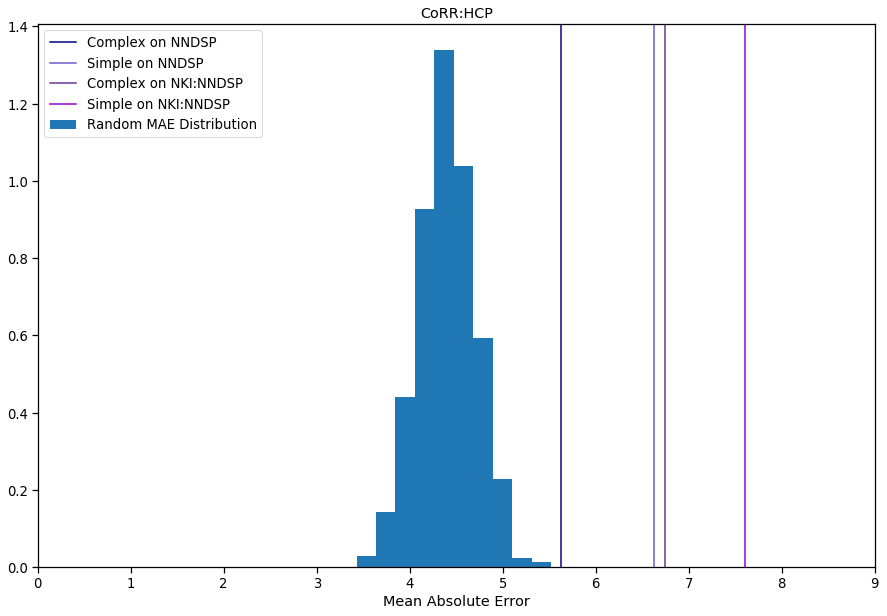

Percentile of  for Complex on NNDSP 100.0
Percentile of  for Simple on NNDSP 100.0
Percentile of  for Complex on NKI:NNDSP 100.0
Percentile of  for Simple on NKI:NNDSP 100.0


In [102]:
plot_rand_hist(corr2hcp_rand_ages, corr2hcp_mae, title='CoRR:HCP', x_max = 9,
              set_context='notebook', fig_tuple=(15, 10), legend=True)
get_percentile(corr2hcp_rand_ages, corr2hcp_mae)

## SALD:HCP

In [103]:
sald2hcp_rand_ages = random_ages(df_sald_hcp)

Picking Random Ages
0
100
200
300
400
500
600
700
800
900
Calculating Mean Absolute Errors


/data/migineishvilin2/python/envs/100runs/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

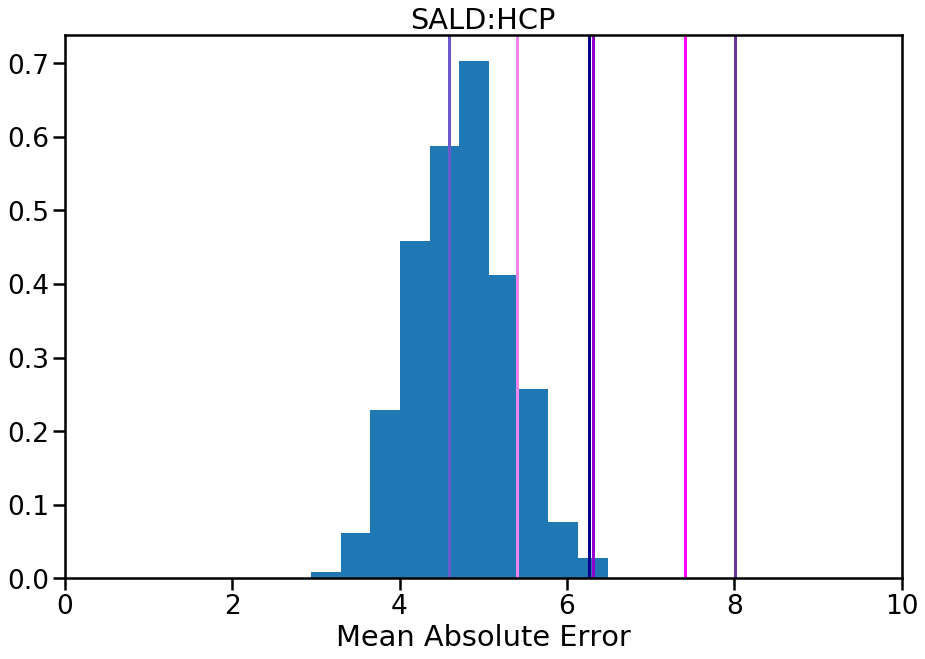

Percentile of  for Complex on NNDSP 99.5995995995996
Percentile of  for Simple on NNDSP 40.44044044044044
Percentile of  for Complex on NKI:NNDSP 100.0
Percentile of  for Simple on NKI:NNDSP 99.5995995995996
Percentile of  for Complex on CoRR:NNDSP 87.18718718718719
Percentile of  for Simple on CoRR:NNDSP 100.0


In [104]:
plot_rand_hist(sald2hcp_rand_ages, sald2hcp_mae, title='SALD:HCP', x_max=10,
              set_context='poster', fig_tuple=(15, 10), legend=False)
get_percentile(sald2hcp_rand_ages, sald2hcp_mae)

## Additional KS Testing

In [105]:
trained_nndsp = {}
trained_nki2nndsp = {}
trained_corr2nndsp = {}

In [106]:
trained_nndsp['Complex on HCP'] = complex_test(df_hcp, 
                                               hcp_bar_dir, 
                                               nndsp_complex_pipes, data='HCP', 
                                               features=hcp_features, pred = 2)
trained_nndsp['Complex on NKI:HCP'] = complex_test(df_nki_hcp, 
                                               nki_bar_dir, 
                                               nndsp_complex_pipes, data='NKI:HCP', 
                                               features=nki2hcp_features, is_int=False, pred = 2)
trained_nndsp['Complex on CoRR:HCP'] = complex_test(df_corr_hcp, 
                                               corr_bar_dir, 
                                               nndsp_complex_pipes, data='CoRR:HCP', 
                                               features=corr2hcp_features, pred = 2, session = '_ses-1')
trained_nndsp['Complex on SALD:HCP'] = complex_test(df_sald_hcp, 
                                               sald_bar_dir, 
                                               nndsp_complex_pipes, data='SALD:HCP', 
                                               features=sald2hcp_features, pred = 2)

895
895
Predicting from Pipelines
Mean Absolute Error (HCP thickness): 5.6008288683611305
Mean Absolute Error (HCP aseg): 6.124706124266517
Mean Absolute Error (HCP area): 5.067209861384121
Mean Absolute Error (HCP stack): 5.997762937916886
71
71
Predicting from Pipelines
Mean Absolute Error (NKI:HCP thickness): 4.676841344926702
Mean Absolute Error (NKI:HCP aseg): 6.030132105669114
Mean Absolute Error (NKI:HCP area): 5.008533692411346
Mean Absolute Error (NKI:HCP stack): 4.948268972404027
83
83
Predicting from Pipelines
Mean Absolute Error (CoRR:HCP thickness): 4.992820147547776
Mean Absolute Error (CoRR:HCP aseg): 4.051685447208585
Mean Absolute Error (CoRR:HCP area): 13.806252021090561
Mean Absolute Error (CoRR:HCP stack): 5.6257687818842905
35
35
Predicting from Pipelines
Mean Absolute Error (SALD:HCP thickness): 5.295433523532927
Mean Absolute Error (SALD:HCP aseg): 3.991980378961029
Mean Absolute Error (SALD:HCP area): 5.194872689264709
Mean Absolute Error (SALD:HCP stack): 6.262

In [107]:
trained_nndsp['Simple on HCP'] = simple_test(df_hcp, hcp_bar_dir, nndsp_simple_pipe, data='HCP', pred = 2)
trained_nndsp['Simple on NKI:HCP'] = simple_test(df_nki_hcp, nki_bar_dir, nndsp_simple_pipe, data='NKI:HCP', pred= 2,
                                                is_int = False)
trained_nndsp['Simple on CoRR:HCP'] = simple_test(df_corr_hcp, corr_bar_dir, nndsp_simple_pipe, data='CoRR:HCP',
                                                 pred=2, session = '_ses-1')
trained_nndsp['Simple on SALD:HCP'] = simple_test(df_sald_hcp, sald_bar_dir, nndsp_simple_pipe, data='SALD:HCP',
                                                 pred=2)

Finding Subjects
895
895
Extracting Features
895
Predicting Pipes
Mean Absolute Error (HCP simple): 11.069409199480788
Finding Subjects
71
71
Extracting Features
71
Predicting Pipes
Mean Absolute Error (NKI:HCP simple): 5.749647352410519
Finding Subjects
83
83
Extracting Features
83
Predicting Pipes
Mean Absolute Error (CoRR:HCP simple): 6.629112927882599
Finding Subjects
35
35
Extracting Features
35
Predicting Pipes
Mean Absolute Error (SALD:HCP simple): 4.591988370947182


In [108]:
trained_nki2nndsp['Complex on HCP'] = complex_test(df_hcp, 
                                               hcp_bar_dir, 
                                               nki2nndsp_complex_pipes, data='HCP', 
                                               features=hcp_features, pred = 2)
trained_nki2nndsp['Complex on CoRR:HCP'] = complex_test(df_corr_hcp, 
                                               corr_bar_dir, 
                                               nki2nndsp_complex_pipes, data='CoRR:HCP', 
                                               features=corr2hcp_features, pred = 2, session = '_ses-1')
trained_nki2nndsp['Complex on SALD:HCP'] = complex_test(df_sald_hcp, 
                                               sald_bar_dir, 
                                               nki2nndsp_complex_pipes, data='SALD:HCP', 
                                               features=sald2hcp_features, pred = 2)

895
895
Predicting from Pipelines
Mean Absolute Error (HCP thickness): 7.288390254111423
Mean Absolute Error (HCP aseg): 8.199216054948065
Mean Absolute Error (HCP area): 5.806885400591533
Mean Absolute Error (HCP stack): 6.761239774923529
83
83
Predicting from Pipelines
Mean Absolute Error (CoRR:HCP thickness): 6.021804711500696
Mean Absolute Error (CoRR:HCP aseg): 6.780436359757347
Mean Absolute Error (CoRR:HCP area): 20.01910781144857
Mean Absolute Error (CoRR:HCP stack): 6.749146814422339
35
35
Predicting from Pipelines
Mean Absolute Error (SALD:HCP thickness): 4.258742253661688
Mean Absolute Error (SALD:HCP aseg): 6.380630426384694
Mean Absolute Error (SALD:HCP area): 4.215176461043989
Mean Absolute Error (SALD:HCP stack): 8.009593609954509


In [109]:
trained_nki2nndsp['Simple on HCP'] = simple_test(df_hcp, hcp_bar_dir, nki2nndsp_simple_pipe, data='HCP', pred = 2)
trained_nki2nndsp['Simple on CoRR:HCP'] = simple_test(df_corr_hcp, corr_bar_dir, nki2nndsp_simple_pipe, data='CoRR:HCP',
                                                 pred=2, session = '_ses-1')

trained_nki2nndsp['Simple on SALD:HCP'] = simple_test(df_sald_hcp, sald_bar_dir, nki2nndsp_simple_pipe, data='SALD:HCP',
                                                 pred=2)

Finding Subjects
895
895
Extracting Features
895
Predicting Pipes
Mean Absolute Error (HCP simple): 11.742704742897637
Finding Subjects
83
83
Extracting Features
83
Predicting Pipes
Mean Absolute Error (CoRR:HCP simple): 7.607382437639236
Finding Subjects
35
35
Extracting Features
35
Predicting Pipes
Mean Absolute Error (SALD:HCP simple): 6.310401574186334


In [110]:
trained_corr2nndsp['Complex on HCP'] = complex_test(df_hcp, 
                                               hcp_bar_dir, 
                                               corr2nndsp_complex_pipes, data='HCP', 
                                               features=hcp_features, pred = 2)
trained_corr2nndsp['Complex on NKI:HCP'] = complex_test(df_nki_hcp, 
                                               nki_bar_dir, 
                                               corr2nndsp_complex_pipes, data='NKI:HCP', 
                                               features=nki2hcp_features, is_int=False, pred = 2)
trained_corr2nndsp['Complex on SALD:HCP'] = complex_test(df_sald_hcp, 
                                               sald_bar_dir, 
                                               corr2nndsp_complex_pipes, data='SALD:HCP', 
                                               features=sald2hcp_features, pred = 2)

895
895
Predicting from Pipelines
Mean Absolute Error (HCP thickness): 8.012291216233358
Mean Absolute Error (HCP aseg): 7.181821429789014
Mean Absolute Error (HCP area): 4.519728169474781
Mean Absolute Error (HCP stack): 6.435024308156152
71
71
Predicting from Pipelines
Mean Absolute Error (NKI:HCP thickness): 5.82073088071513
Mean Absolute Error (NKI:HCP aseg): 5.580204901504406
Mean Absolute Error (NKI:HCP area): 6.107580951456226
Mean Absolute Error (NKI:HCP stack): 6.279537076186723
35
35
Predicting from Pipelines
Mean Absolute Error (SALD:HCP thickness): 4.262844248691877
Mean Absolute Error (SALD:HCP aseg): 4.740214980960279
Mean Absolute Error (SALD:HCP area): 4.908463027254348
Mean Absolute Error (SALD:HCP stack): 5.408093307882595


In [111]:
trained_corr2nndsp['Simple on HCP'] = simple_test(df_hcp, hcp_bar_dir, corr2nndsp_simple_pipe, data='HCP', pred = 2)
trained_corr2nndsp['Simple on NKI:HCP'] = simple_test(df_nki_hcp, nki_bar_dir, corr2nndsp_simple_pipe, data='NKI:HCP', 
                                                      pred=2,
                                                is_int = False)
trained_corr2nndsp['Simple on SALD:HCP'] = simple_test(df_sald_hcp, sald_bar_dir, corr2nndsp_simple_pipe, data='SALD:HCP',
                                                 pred=2)

Finding Subjects
895
895
Extracting Features
895
Predicting Pipes
Mean Absolute Error (HCP simple): 10.313632814422206
Finding Subjects
71
71
Extracting Features
71
Predicting Pipes
Mean Absolute Error (NKI:HCP simple): 7.791724864333149
Finding Subjects
35
35
Extracting Features
35
Predicting Pipes
Mean Absolute Error (SALD:HCP simple): 7.406291982569422


### Tested on HCP

In [112]:
from scipy import stats
import numpy as np

print("COMPLEX MODEL:")
print("Trained on NNDSP vs NKI:NNDSP (HCP)", stats.ks_2samp(trained_nndsp['Complex on HCP'],
                                                      trained_nki2nndsp['Complex on HCP']))

print("Trained on NKI:NNDSP vs CoRR:NNDSP (HCP)", stats.ks_2samp(trained_nki2nndsp['Complex on HCP'],
                                                      trained_corr2nndsp['Complex on HCP']))

print("Trained on CoRR:NNDSP vs NNDSP (HCP)", stats.ks_2samp(trained_corr2nndsp['Complex on HCP'],
                                                      trained_nndsp['Complex on HCP']))

COMPLEX MODEL:
Trained on NNDSP vs NKI:NNDSP (HCP) Ks_2sampResult(statistic=0.09273743016759783, pvalue=0.0008288759037199825)
Trained on NKI:NNDSP vs CoRR:NNDSP (HCP) Ks_2sampResult(statistic=0.13184357541899444, pvalue=2.9124746510707246e-07)
Trained on CoRR:NNDSP vs NNDSP (HCP) Ks_2sampResult(statistic=0.1463687150837989, pvalue=7.496795479059533e-09)


In [113]:
print("SIMPLE MODEL:")
print("Trained on NNDSP vs NKI:NNDSP (HCP)", stats.ks_2samp(trained_nndsp['Simple on HCP'],
                                                      trained_nki2nndsp['Simple on HCP']))

print("Trained on NKI:NNDSP vs CoRR:NNDSP (HCP)", stats.ks_2samp(trained_nki2nndsp['Simple on HCP'],
                                                      trained_corr2nndsp['Simple on HCP']))

print("Trained on CoRR:NNDSP vs NNDSP (HCP)", stats.ks_2samp(trained_corr2nndsp['Simple on HCP'],
                                                      trained_nndsp['Simple on HCP']))

SIMPLE MODEL:
Trained on NNDSP vs NKI:NNDSP (HCP) Ks_2sampResult(statistic=0.07597765363128495, pvalue=0.010730453719678665)
Trained on NKI:NNDSP vs CoRR:NNDSP (HCP) Ks_2sampResult(statistic=0.14413407821229052, pvalue=1.3495804985932235e-08)
Trained on CoRR:NNDSP vs NNDSP (HCP) Ks_2sampResult(statistic=0.08715083798882678, pvalue=0.002059441031413798)


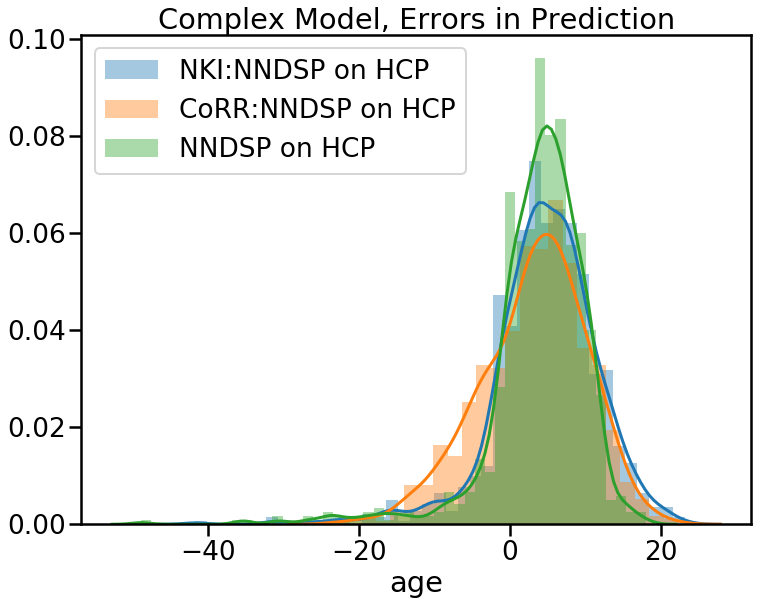

In [119]:
import seaborn as sns
plt.figure(figsize = (12, 9))
sns.distplot(trained_nki2nndsp['Complex on HCP'], label = 'NKI:NNDSP on HCP')
sns.distplot(trained_corr2nndsp['Complex on HCP'], label = 'CoRR:NNDSP on HCP')
sns.distplot(trained_nndsp['Complex on HCP'], label = 'NNDSP on HCP')
plt.title('Complex Model, Errors in Prediction')
plt.legend()
plt.show()

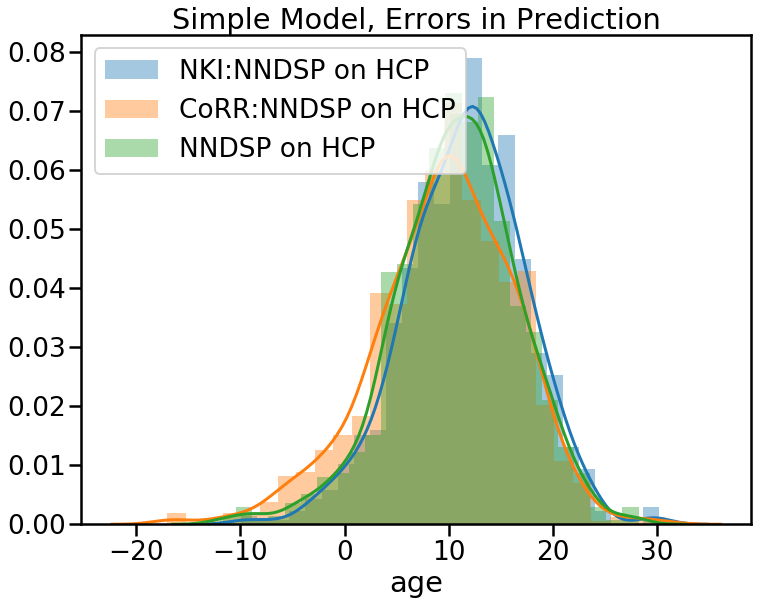

In [120]:
import seaborn as sns
plt.figure(figsize = (12, 9))
sns.distplot(trained_nki2nndsp['Simple on HCP'], label = 'NKI:NNDSP on HCP')
sns.distplot(trained_corr2nndsp['Simple on HCP'], label = 'CoRR:NNDSP on HCP')
sns.distplot(trained_nndsp['Simple on HCP'], label = 'NNDSP on HCP')
plt.title('Simple Model, Errors in Prediction')
plt.legend()
plt.show()

### Test on NKI:HCP

In [121]:
from scipy import stats
import numpy as np

print("COMPLEX MODEL")
print("Trained on CoRR:NNDSP vs NNDSP (NKI:HCP)", stats.ks_2samp(trained_corr2nndsp['Complex on NKI:HCP'],
                                                      trained_nndsp['Complex on NKI:HCP']))

COMPLEX MODEL
Trained on CoRR:NNDSP vs NNDSP (NKI:HCP) Ks_2sampResult(statistic=0.2676056338028169, pvalue=0.009750633629361648)


In [122]:
print("SIMPLE MODEL")
print("Trained on CoRR:NNDSP vs NNDSP (NKI:HCP)", stats.ks_2samp(trained_corr2nndsp['Simple on NKI:HCP'],
                                                      trained_nndsp['Simple on NKI:HCP']))

SIMPLE MODEL
Trained on CoRR:NNDSP vs NNDSP (NKI:HCP) Ks_2sampResult(statistic=0.33802816901408456, pvalue=0.0004093376607728095)


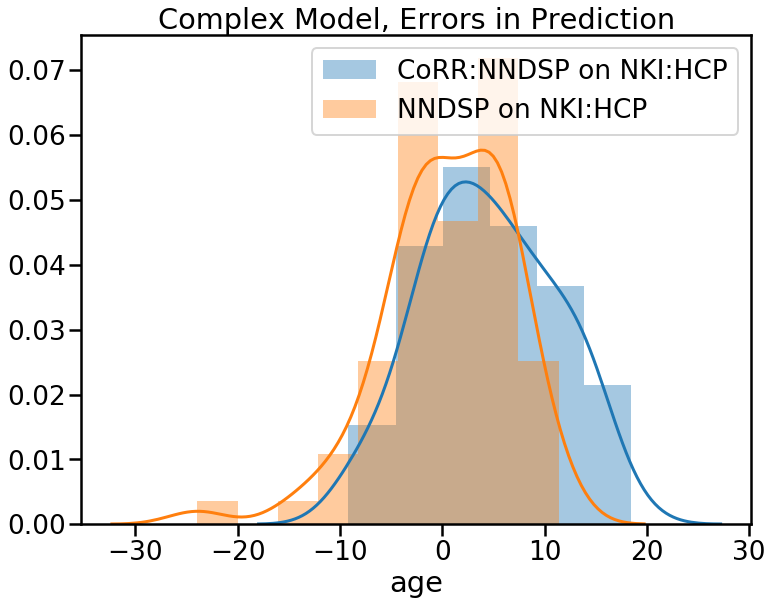

In [124]:
import seaborn as sns
plt.figure(figsize = (12, 9))
sns.distplot(trained_corr2nndsp['Complex on NKI:HCP'], label = 'CoRR:NNDSP on NKI:HCP')
sns.distplot(trained_nndsp['Complex on NKI:HCP'], label = 'NNDSP on NKI:HCP')
plt.title('Complex Model, Errors in Prediction')
plt.legend()
plt.show()

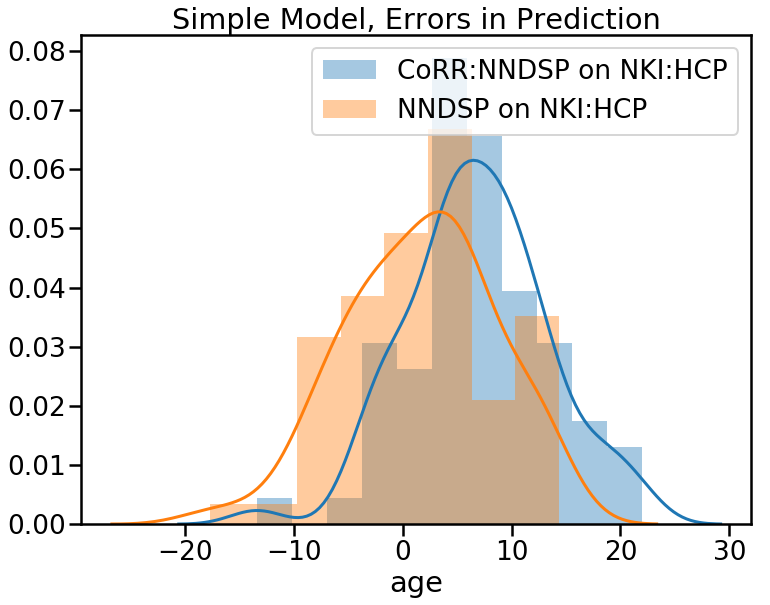

In [126]:
import seaborn as sns
plt.figure(figsize = (12, 9))
sns.distplot(trained_corr2nndsp['Simple on NKI:HCP'], label = 'CoRR:NNDSP on NKI:HCP')
sns.distplot(trained_nndsp['Simple on NKI:HCP'], label = 'NNDSP on NKI:HCP')
plt.title('Simple Model, Errors in Prediction')
plt.legend()
plt.show()

## Test on CoRR:HCP

COMPLEX MODEL
Trained on NKI:NNDSP vs NNDSP (CoRR:HCP) Ks_2sampResult(statistic=0.1566265060240964, pvalue=0.23876345599248852)
SIMPLE MODEL
Trained on NKI:NNDSP vs NNDSP (CoRR:HCP) Ks_2sampResult(statistic=0.20481927710843373, pvalue=0.05294222896461816)


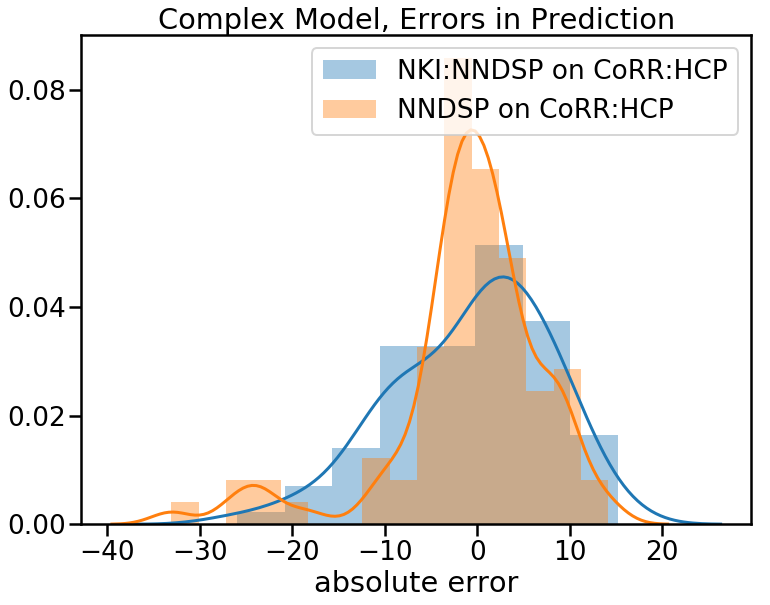

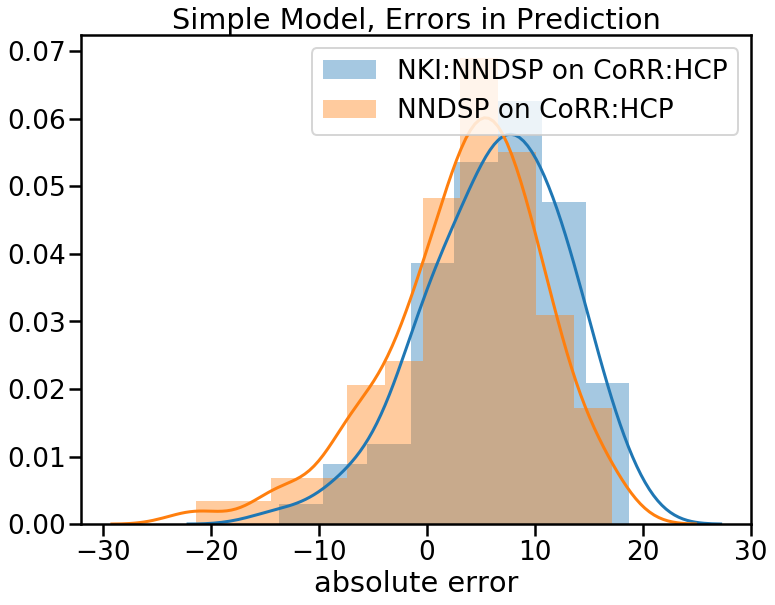

In [130]:
from scipy import stats
import numpy as np

print("COMPLEX MODEL")
print("Trained on NKI:NNDSP vs NNDSP (CoRR:HCP)", stats.ks_2samp(trained_nki2nndsp['Complex on CoRR:HCP'],
                                                      trained_nndsp['Complex on CoRR:HCP']))

print("SIMPLE MODEL")
print("Trained on NKI:NNDSP vs NNDSP (CoRR:HCP)", stats.ks_2samp(trained_nki2nndsp['Simple on CoRR:HCP'],
                                                      trained_nndsp['Simple on CoRR:HCP']))

import seaborn as sns
plt.figure(figsize = (12, 9))
sns.distplot(trained_nki2nndsp['Complex on CoRR:HCP'], label = 'NKI:NNDSP on CoRR:HCP')
sns.distplot(trained_nndsp['Complex on CoRR:HCP'], label = 'NNDSP on CoRR:HCP')
plt.title('Complex Model, Errors in Prediction')
plt.xlabel('absolute error')
plt.legend()
plt.show()

import seaborn as sns
plt.figure(figsize = (12, 9))
sns.distplot(trained_nki2nndsp['Simple on CoRR:HCP'], label = 'NKI:NNDSP on CoRR:HCP')
sns.distplot(trained_nndsp['Simple on CoRR:HCP'], label = 'NNDSP on CoRR:HCP')
plt.title('Simple Model, Errors in Prediction')
plt.xlabel('absolute error')
plt.legend()
plt.show()

### Test on SALD:HCP

COMPLEX MODEL
Trained on NNDSP vs NKI:NNDSP (SALD:HCP) Ks_2sampResult(statistic=0.17142857142857143, pvalue=0.6402820550139576)
Trained on NKI:NNDSP vs CoRR:NNDSP (SALD:HCP) Ks_2sampResult(statistic=0.3714285714285714, pvalue=0.01134416704970723)
Trained on CoRR:NNDSP vs NNDSP (SALD:HCP) Ks_2sampResult(statistic=0.28571428571428575, pvalue=0.09372144073616406)
SIMPLE MODEL
Trained on NNDSP vs NKI:NNDSP (SALD:HCP) Ks_2sampResult(statistic=0.3142857142857143, pvalue=0.04928972910356405)
Trained on NKI:NNDSP vs CoRR:NNDSP (SALD:HCP) Ks_2sampResult(statistic=0.17142857142857137, pvalue=0.6402820550139581)
Trained on CoRR:NNDSP vs NNDSP (SALD:HCP) Ks_2sampResult(statistic=0.3142857142857143, pvalue=0.04928972910356405)


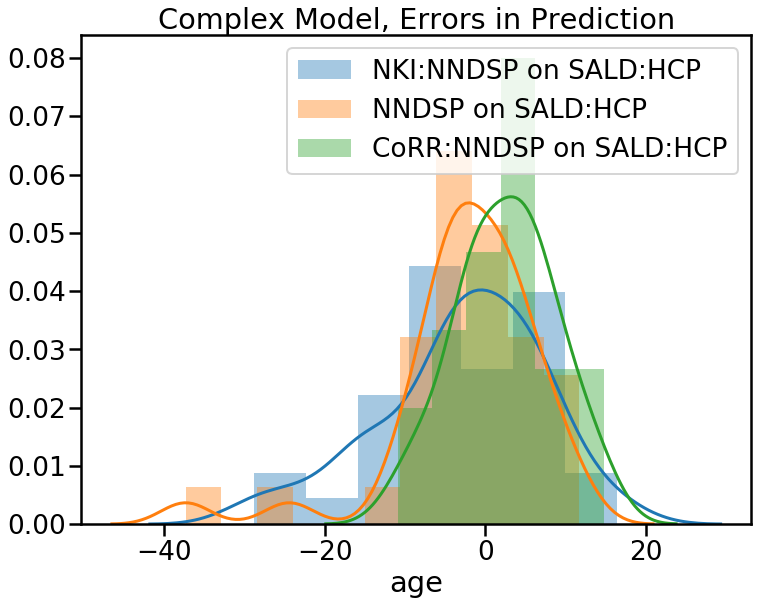

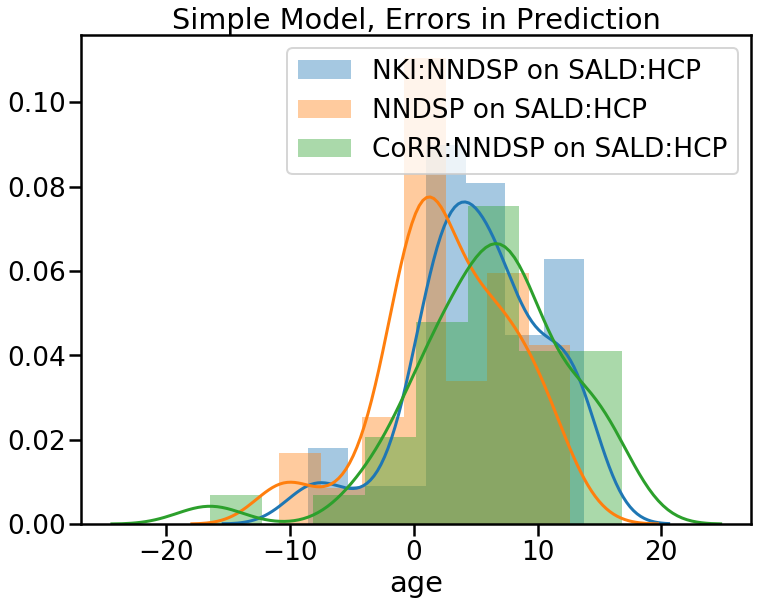

In [129]:
from scipy import stats
import numpy as np

print("COMPLEX MODEL")
print("Trained on NNDSP vs NKI:NNDSP (SALD:HCP)", stats.ks_2samp(trained_nndsp['Complex on SALD:HCP'],
                                                      trained_nki2nndsp['Complex on SALD:HCP']))
print("Trained on NKI:NNDSP vs CoRR:NNDSP (SALD:HCP)", stats.ks_2samp(trained_nki2nndsp['Complex on SALD:HCP'],
                                                      trained_corr2nndsp['Complex on SALD:HCP']))
print("Trained on CoRR:NNDSP vs NNDSP (SALD:HCP)", stats.ks_2samp(trained_corr2nndsp['Complex on SALD:HCP'],
                                                      trained_nndsp['Complex on SALD:HCP']))

print("SIMPLE MODEL")
print("Trained on NNDSP vs NKI:NNDSP (SALD:HCP)", stats.ks_2samp(trained_nndsp['Simple on SALD:HCP'],
                                                      trained_nki2nndsp['Simple on SALD:HCP']))
print("Trained on NKI:NNDSP vs CoRR:NNDSP (SALD:HCP)", stats.ks_2samp(trained_nki2nndsp['Simple on SALD:HCP'],
                                                      trained_corr2nndsp['Simple on SALD:HCP']))
print("Trained on CoRR:NNDSP vs NNDSP (SALD:HCP)", stats.ks_2samp(trained_corr2nndsp['Simple on SALD:HCP'],
                                                      trained_nndsp['Simple on SALD:HCP']))

import seaborn as sns
plt.figure(figsize = (12, 9))
sns.distplot(trained_nki2nndsp['Complex on SALD:HCP'], label = 'NKI:NNDSP on SALD:HCP')
sns.distplot(trained_nndsp['Complex on SALD:HCP'], label = 'NNDSP on SALD:HCP')
sns.distplot(trained_corr2nndsp['Complex on SALD:HCP'], label = 'CoRR:NNDSP on SALD:HCP')
plt.title('Complex Model, Errors in Prediction')
plt.legend()
plt.show()

import seaborn as sns
plt.figure(figsize = (12, 9))
sns.distplot(trained_nki2nndsp['Simple on SALD:HCP'], label = 'NKI:NNDSP on SALD:HCP')
sns.distplot(trained_nndsp['Simple on SALD:HCP'], label = 'NNDSP on SALD:HCP')
sns.distplot(trained_corr2nndsp['Simple on SALD:HCP'], label = 'CoRR:NNDSP on SALD:HCP')
plt.title('Simple Model, Errors in Prediction')
plt.legend()
plt.show()